# What's up with `.nyc`

All websites have a top-level domain (TLD) that is used to indicate the purpose of the website. For example, `.com`, `.org`, `.sucks`, `.io`, and many others.

The `.nyc` TLD is a bit of an outlier. There are only [a handful of TLDs](https://en.wikipedia.org/wiki/List_of_Internet_top-level_domains#Geographic_top-level_domains) that are used to indicate a specific geographic area that's *not* an entire country. Said another way, most cities or geographic areas don't have their own TLD. While it's easy for internet users to navigate, it's certainly not common practice for websites to use a geographically-focused TLD like `.nyc`.

That said, I was curious exactly how `.nyc` has been used since its introduction as a generally-available TLD in 2014. Thankfully, [NYC OpenData maintains an open data source for `.nyc` Domain Registrations](https://data.cityofnewyork.us/Business/-nyc-Domain-Registrations/9cw8-7heb/about_data) that can be used to understand the history and use of `.nyc` domains.

This project is exploratory, without a particular hypothesis in mind. I'm aiming to understand and visualize `.nyc` TLD usage over time, and connect it to real-world events and trends when possible.

## Quick reference on URLs

Before we get started, some quick background on URLs. Skip to the next section if you're already familiar, or use this as a reference as you read.

Websites are a set of content–text, images, interactive elements–located at a **URL** (Uniform Resource Locator), which is like a digital address. When we navigate to a URL in a web browser, we're requesting the data located at that address.

Just like real-world geographic addresses, URLs have multiple components:

- **Domain name** - The domain name is what we commonly think of as a website name, and is a combination of all domain components. For example, `example.com`, `www.baileykane.co`, and `docs.google.com` are all domain names. Each component is separated by a `.`.
- **Top-level domain (TLD)** - The top-level domain is the highest level of a domain name. It's used to tell users the general purpose of the website. For example, `.com` is used for commercial websites, `.org` is used for other types of organizations, `.gov` is used for government websites, and `.fr` is used for websites in French / hosted in France. In a full domain name, the **TLD** is the right-most piece.
- **Secondary Level Domain (SLD)** - The domain component immediately before the TLD. Many websites *only* have a SLD, without any additional domain components. For example `example.com` or `bsky.app`.
- **Subdomain** - The domain components preceding the SLD. These are optional, and are used to separate functions, services, or content for a specific domain name. For example, `developer.mozilla.org`, where `developer` is the subdomain.
- **Path** - The path within a website to a specific resource, or page. For example, `baileykane.co/recipes` navigates to the `recipes` page on the `baileykane.co` domain name.
- **Scheme** - The beginning of a URL defines the **Scheme**, or the way that the browser needs to request the data at this URL. Most commonly this is `https` or `http` (the insecure version of `https`), which are the modern standard used to access website content. This could also be `mailto` for opening an email client, or `tel` for opening a phone call client.

*There's more to learn about URLs, and some things were simplified here, but we don't need more detail for this project. [See Mozilla's documentation for more information.](https://developer.mozilla.org/en-US/docs/Learn/Common_questions/Web_mechanics/What_is_a_URL)*

## Why `.nyc`

Anyone can register a domain name with a common TLD like `.com`, so why choose `.nyc`?

[From the `.nyc` registration site](https://www.ownit.nyc/what-is-nyc):

>### What is .nyc?
>
>.nyc is The Official Web Address for New Yorkers. Anyone with a business, brand or residence within the five boroughs can register a .nyc domain name.
>
>**What does it mean to own a .nyc?**
>
>Own It. Our tagline is more than a call-to-action; it’s a state of mind. It’s the internal voice inside us: living, working, and creating, continually pushing to be the best.
>
>**Never settle.**
>
>New York City is the place where success takes many shapes and where there are countless ways to dream big. The .nyc extension provides infinite possibilities and a powerful way to use your location as proof of your value and success.
>
>**Stand out from the crowd.**
>
>Beyond having a physical street address or primary place of residence in the City, .nyc owners share a desire to be unforgettable, inspirational and above all, “make it” in New York.

Let's find out if this is actually how `.nyc` domains are being used.

## `.nyc` Open Data

The existing [data on `.nyc` registrations from NYC Open Data](https://data.cityofnewyork.us/Business/-nyc-Domain-Registrations/9cw8-7heb/about_data) is available in multiple formats. For the sake of easily understanding and processing the data, we'll imagine it in a `CSV` file. There are three columns:

| URL | Registration Date | Nexus Category |
|---|---|---|
|caffeine.nyc|12/23/2015 05:39:04 PM|INDIV|
|flirts.nyc|02/18/2024 06:56:50 PM|ORG|
|aclipse.nyc|01/04/2017 06:06:11 AM|INDIV|
| etc.|...|...|

`URL` is the domain name that was registered, and `Registration Date` is the date and time that the registration was made.

### Nexus Category

`Nexus Category` was a new one for me. Nexus Categories are primarily used to indicate the type of person or entity registering domains with the `.us` TLD. There are [various options for each entity type](https://www.a2hosting.com/kb/getting-started-guide/registering-a-domain1/nexus-codes-and-us-domain-registration/), generally categorized into personal/individual, business, and foreign entity registration.

`.nyc` domains simplify these categories to two:

- **INDIV** - Described as, "Private individual with a physical NYC street address" on the domain registration form
- **ORG** - Described as, "Corporation or charity with a physical NYC street address"

This categorization is part of establishing proof of NYC presence by the registrant. I'm not sure how easily or strictly this is enforced, but the intent is to make sure that people who are registering `.nyc` domains are indeed living or operating within NYC.

[More on the `.nyc` Nexus Policy.](https://www.ownit.nyc/policies/nyc-nexus-policy)

## Initial analysis

Let's take a look at the data.

Looking at a few sample rows shows us the data is formatted as we'd expect: URL, registration date, and the nexus category.

In [151]:
import pandas as pd

# Read the CSV doc into a DataFrame (two-dimensional data)
initial_df = pd.read_csv('../files/nyc_Domain_Registrations_20241115.csv')

print(initial_df)

                         url       registration_date nexus_category
0               caffeine.nyc  12/23/2015 05:39:04 PM          INDIV
1                 flirts.nyc  02/18/2024 06:56:50 PM            ORG
2                aclipse.nyc  01/04/2017 06:06:11 AM          INDIV
3           brooklynruns.nyc  04/10/2018 03:46:27 PM            ORG
4             bignycpass.nyc  10/14/2015 11:41:15 AM            ORG
...                      ...                     ...            ...
61230       iamelemental.nyc  10/03/2014 03:40:47 PM          INDIV
61231      michaelsuarez.nyc  05/23/2024 10:01:17 AM          INDIV
61232             lvrusa.nyc  11/04/2014 04:04:48 PM          INDIV
61233           16000psi.nyc  02/02/2023 01:38:06 PM          INDIV
61234  connectingthedots.nyc  03/06/2023 06:47:11 PM          INDIV

[61235 rows x 3 columns]


### When were domains registered?

First, let's plot domain registrations over time.

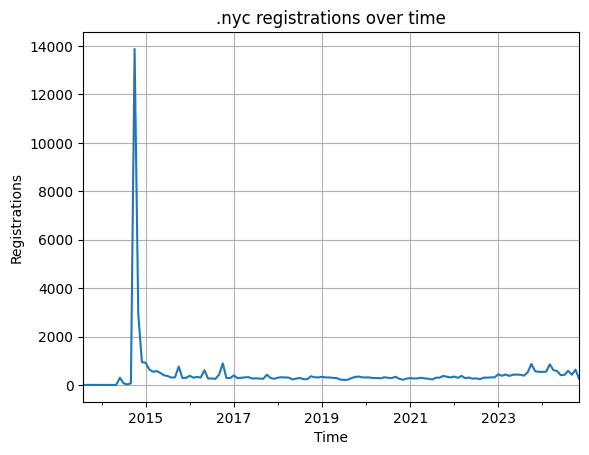

In [152]:

import matplotlib.pyplot as plt
import copy

# Create copy of initial data to analyze by date
df_by_date = copy.deepcopy(initial_df)

# Ensure the registration_date column is datetimes
df_by_date['registration_date'] = pd.to_datetime(df_by_date['registration_date'], format="%m/%d/%Y %I:%M:%S %p")

# Set the index column of the DataFrame to the registration_date values
df_by_date.set_index('registration_date', inplace=True)

# Get count of registrations per month ('ME')
counts = df_by_date.resample('ME').size()

# Close existing plots, set up new plots
plt.close('all')
plt.figure()
counts.plot()

# Formatting details. Will be reused
def format_plot_for_reg_date():
    plt.title('.nyc registrations over time')
    plt.xlabel('Time')
    plt.ylabel('Registrations')
    plt.grid(True)

format_plot_for_reg_date()

# Show plot
plt.show()

Plotting the registrations over time shows a significant spike in October 2014. The `.nyc` TLD was made available by the governing body, ICANN, in *March* 2014, so I assume NYC just didn't launch the program formally until October.

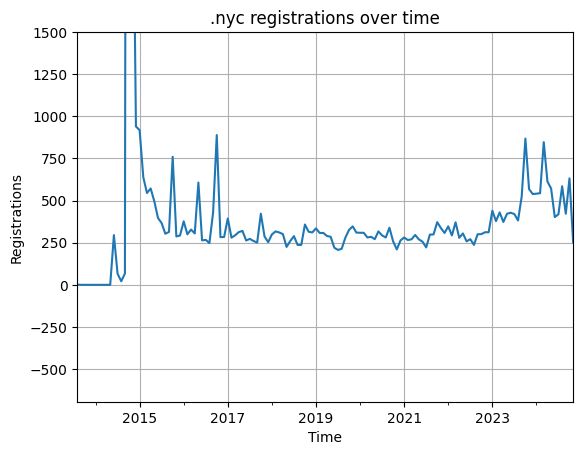

In [153]:
counts.plot()

# Formatting
format_plot_for_reg_date()
plt.ylim(top=1500)

# Show plot
plt.show()

Scaling the plot down to ignore the peak in October 2014 shows that registration activity has gone through a few periods:

1. Almost zero activity between the first registration (nic.nyc in August 2013) and October 2014, excluding a smaller spike in June 2014
2. The spike in October 2014, with relatively high registrations until 2016.
3. Stable registrations from 2016 to 2023, with a few spikes.
4. Since 2023, registrations have increased somewhat, from ~300 / month to ~500 / month.

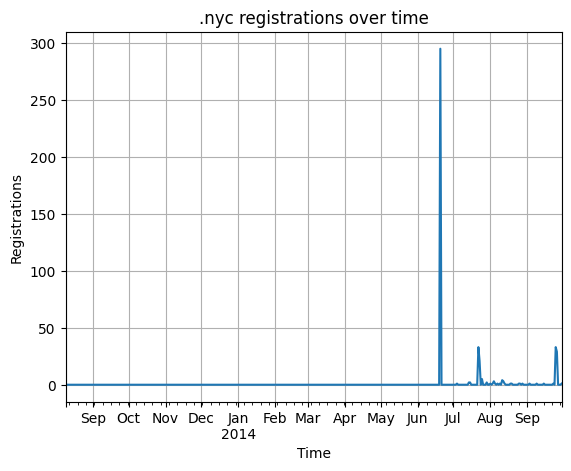

In [154]:
plt.close('all')

# Create copy of initial data to look at just the first year of data
first_year = copy.deepcopy(initial_df)

# Ensure the registration_date column is datetimes
first_year['registration_date'] = pd.to_datetime(first_year['registration_date'], format="%m/%d/%Y %I:%M:%S %p")

# Filter to registrations before 2014-10-01
first_year = first_year[first_year['registration_date'] < '2014-10-01']

# Set the index column of the DataFrame to the registration_date values
first_year.set_index('registration_date', inplace=True)

# Get count of registrations per day ('D')
counts = first_year.resample('D').size()
counts.plot()

# Formatting
format_plot_for_reg_date()

# Show plot
plt.show()


#### The first year, August 2013 - October 2014

Looks like there was a single day in June where the majority of registrations happened.

In [155]:
first_year.describe()

,url,nexus_category
count,450,450
unique,450,2
top,brooklynplanning.nyc,ORG
freq,1,443


Almost all of the registrations in this time, 443 of 450, were in the `ORG` category.

I'm guessing there was an early-access program for select businesess to register domain names before the general launch.

Let's check out the `INDIV` registrations.

In [156]:
first_year_indiv = first_year[first_year['nexus_category'] == 'INDIV']

print(first_year_indiv)

                                            url nexus_category
registration_date                                             
2014-07-23 19:56:51              unionsqbid.nyc          INDIV
2014-07-23 19:56:52      unionsqpartnership.nyc          INDIV
2014-07-23 19:56:54          unionsquarebid.nyc          INDIV
2014-07-23 19:56:55  unionsquarepartnership.nyc          INDIV
2014-06-20 15:11:23           nyc-limousine.nyc          INDIV
2014-06-20 15:13:55                    ldny.nyc          INDIV
2014-06-20 15:11:38            nyclimousine.nyc          INDIV


Well, judging by the domain name, these all look like organizations too, despite the `INDIV` nexus category.

We can also see examples of registering multiple domain names for (likely) the same entity. For example, `nyc-limousine.nyc` and `nyclimousine.nyc` were most likely registered by the same person / entity.

Buying multiple domains to redirect them to a primary domain is common practice. For example, `volcom.nyc` redirects to `volcom.com`, and Volcom likely bought `volcom.nyc` to control a domain that can be used to represent their brand, even if in practice they're just redirecting it to `volcom.com`.